# MiRAC-A
The following example demonstrates the use of MiRAC-A data collected during ACLOUD, AFLUX and MOSAiC-ACA. The Microwave Radar/Radiometer for Arctic Clouds (MiRAC) consists of an active component, a 94 GHz Frequency Modulated Continuous Wave (FMCW) cloud radar, and a passive 89 GHz microwave radiometer. MiRAC-A is mounted on Polar 5 with a fixed viewing angle of 25° against flight direction.

More information on the instrument can be found in [Mech et al. (2019)](https://amt.copernicus.org/articles/12/5019/2019/). If you have questions or if you would like to use the data for a publication, please don't hesitate to get in contact with the dataset authors as stated in the dataset attributes `contact` or `author`.

## Data access
* To load the data we first load the (AC)³airborne meta data catalogue. More information on the catalog can be found [here](https://github.com/igmk/ac3airborne-intake#ac3airborne-intake-catalogue).

In [1]:
import ac3airborne

In [2]:
cat = ac3airborne.get_intake_catalog()
list(cat.Polar5.MIRAC_A)

['ACLOUD_P5_RF04',
 'ACLOUD_P5_RF05',
 'ACLOUD_P5_RF06',
 'ACLOUD_P5_RF07',
 'ACLOUD_P5_RF08',
 'ACLOUD_P5_RF10',
 'ACLOUD_P5_RF11',
 'ACLOUD_P5_RF15',
 'ACLOUD_P5_RF17',
 'ACLOUD_P5_RF18',
 'ACLOUD_P5_RF19',
 'ACLOUD_P5_RF20',
 'ACLOUD_P5_RF21',
 'ACLOUD_P5_RF22',
 'ACLOUD_P5_RF23',
 'ACLOUD_P5_RF25',
 'AFLUX_P5_RF03',
 'AFLUX_P5_RF04',
 'AFLUX_P5_RF05',
 'AFLUX_P5_RF06',
 'AFLUX_P5_RF07',
 'AFLUX_P5_RF08',
 'AFLUX_P5_RF09',
 'AFLUX_P5_RF10',
 'AFLUX_P5_RF11',
 'AFLUX_P5_RF12',
 'AFLUX_P5_RF13',
 'AFLUX_P5_RF14',
 'AFLUX_P5_RF15',
 'MOSAiC-ACA_P5_RF05',
 'MOSAiC-ACA_P5_RF06',
 'MOSAiC-ACA_P5_RF07',
 'MOSAiC-ACA_P5_RF08',
 'MOSAiC-ACA_P5_RF09',
 'MOSAiC-ACA_P5_RF10',
 'MOSAiC-ACA_P5_RF11']

```{note}
Have a look at the attributes of the xarray dataset `ds_mirac_a` for all relevant information on the dataset, such as author, contact, or citation infromation.
```

In [3]:
ds_mirac_a = ds_cth = cat['Polar5']['MIRAC_A']['ACLOUD_P5_RF05'].to_dask()
ds_mirac_a

<xarray.Dataset>
Dimensions:        (height: 1400, time: 11765)
Coordinates:
  * time           (time) datetime64[ns] 2017-05-25T08:18:18 ... 2017-05-25T1...
  * height         (height) float32 -1e+03 -995.0 -990.0 ... 5.99e+03 5.995e+03
Data variables:
    Ze_unfiltered  (time, height) float32 ...
    Ze             (time, height) float32 ...
    TB_89          (time) float32 ...
    Ze_flag        (time, height) int32 ...
    altitude       (time) float32 ...
    lon            (time, height) float32 ...
    lat            (time, height) float32 ...
Attributes: (12/14)
    title:        MiRAC-A observations onboard Polar 5 during ACLOUD
    institution:  Institute of Geophysics and Meteorology (IGM), University o...
    source:       airborne observation
    history:      measured onboard Polar 5 during ACLOUD campaign; processed,...
    comment:      the radar system and the 89 GHz channel were inclined by 25...
    convention:   CF-1.8
    ...           ...
    platform:     Polar 5
    flight_id:    RF05
    instrument:   MiRAC-A: Microwave Radar/radiometer for Arctic Clouds (active)
    author:       Nils Risse
    contact:      n.risse@uni-koeln.de, l.kliesch@uni-koeln.de, mario.mech@un...
    created:      2021-08-09

The dataset includes the radar reflectivity (`Ze`, `Ze_unfiltered`), the radar reflectivity filter mask (`Ze_flag`), the 89 GHz brightness temperature (`TB_89`) as well as information on the aircraft's flight altitude (`altitude`). The radar reflectivity is defined on a regular `time`-`height` grid with corresponding target positions (`lat`, `lon`). The full dataset is available on PANGAEA.

## Load Polar 5 flight phase information
Polar 5 flights are divided into segments to easily access start and end times of flight patterns. For more information have a look at the respective [github](https://github.com/igmk/flight-phase-separation) repository.

At first we want to load the flight segments of (AC)³airborne

In [4]:
meta = ac3airborne.get_flight_segments() 

The following command lists all flight segments into the dictionary `segments`

In [5]:
segments = {s.get("segment_id"): {**s, "flight_id": flight["flight_id"]}
             for platform in meta.values()
             for flight in platform.values()
             for s in flight["segments"]
            }

In this example we want to look at a high-level segment during ACLOUD RF05

In [1]:
seg = segments["ACLOUD_P5_RF05_hl09"]

NameError: name 'segments' is not defined

Using the start and end times of the segment `ACLOUD_P5_RF05_hl09` stored in `seg`, we slice the MiRAC data to this flight section.

In [7]:
ds_mirac_a_sel = ds_mirac_a.sel(time=slice(seg["start"], seg["end"]))

## Plots

The flight section during ACLOUD RF05 is flown at about 3 km altitude in west-east direction during a cold-air outbreak event perpendicular to the wind field. Clearly one can identify the roll-cloud structure in the radar reflectivity and the 89 GHz brightness temperature.

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from numpy import log10
plt.style.use("../mplstyle/book")

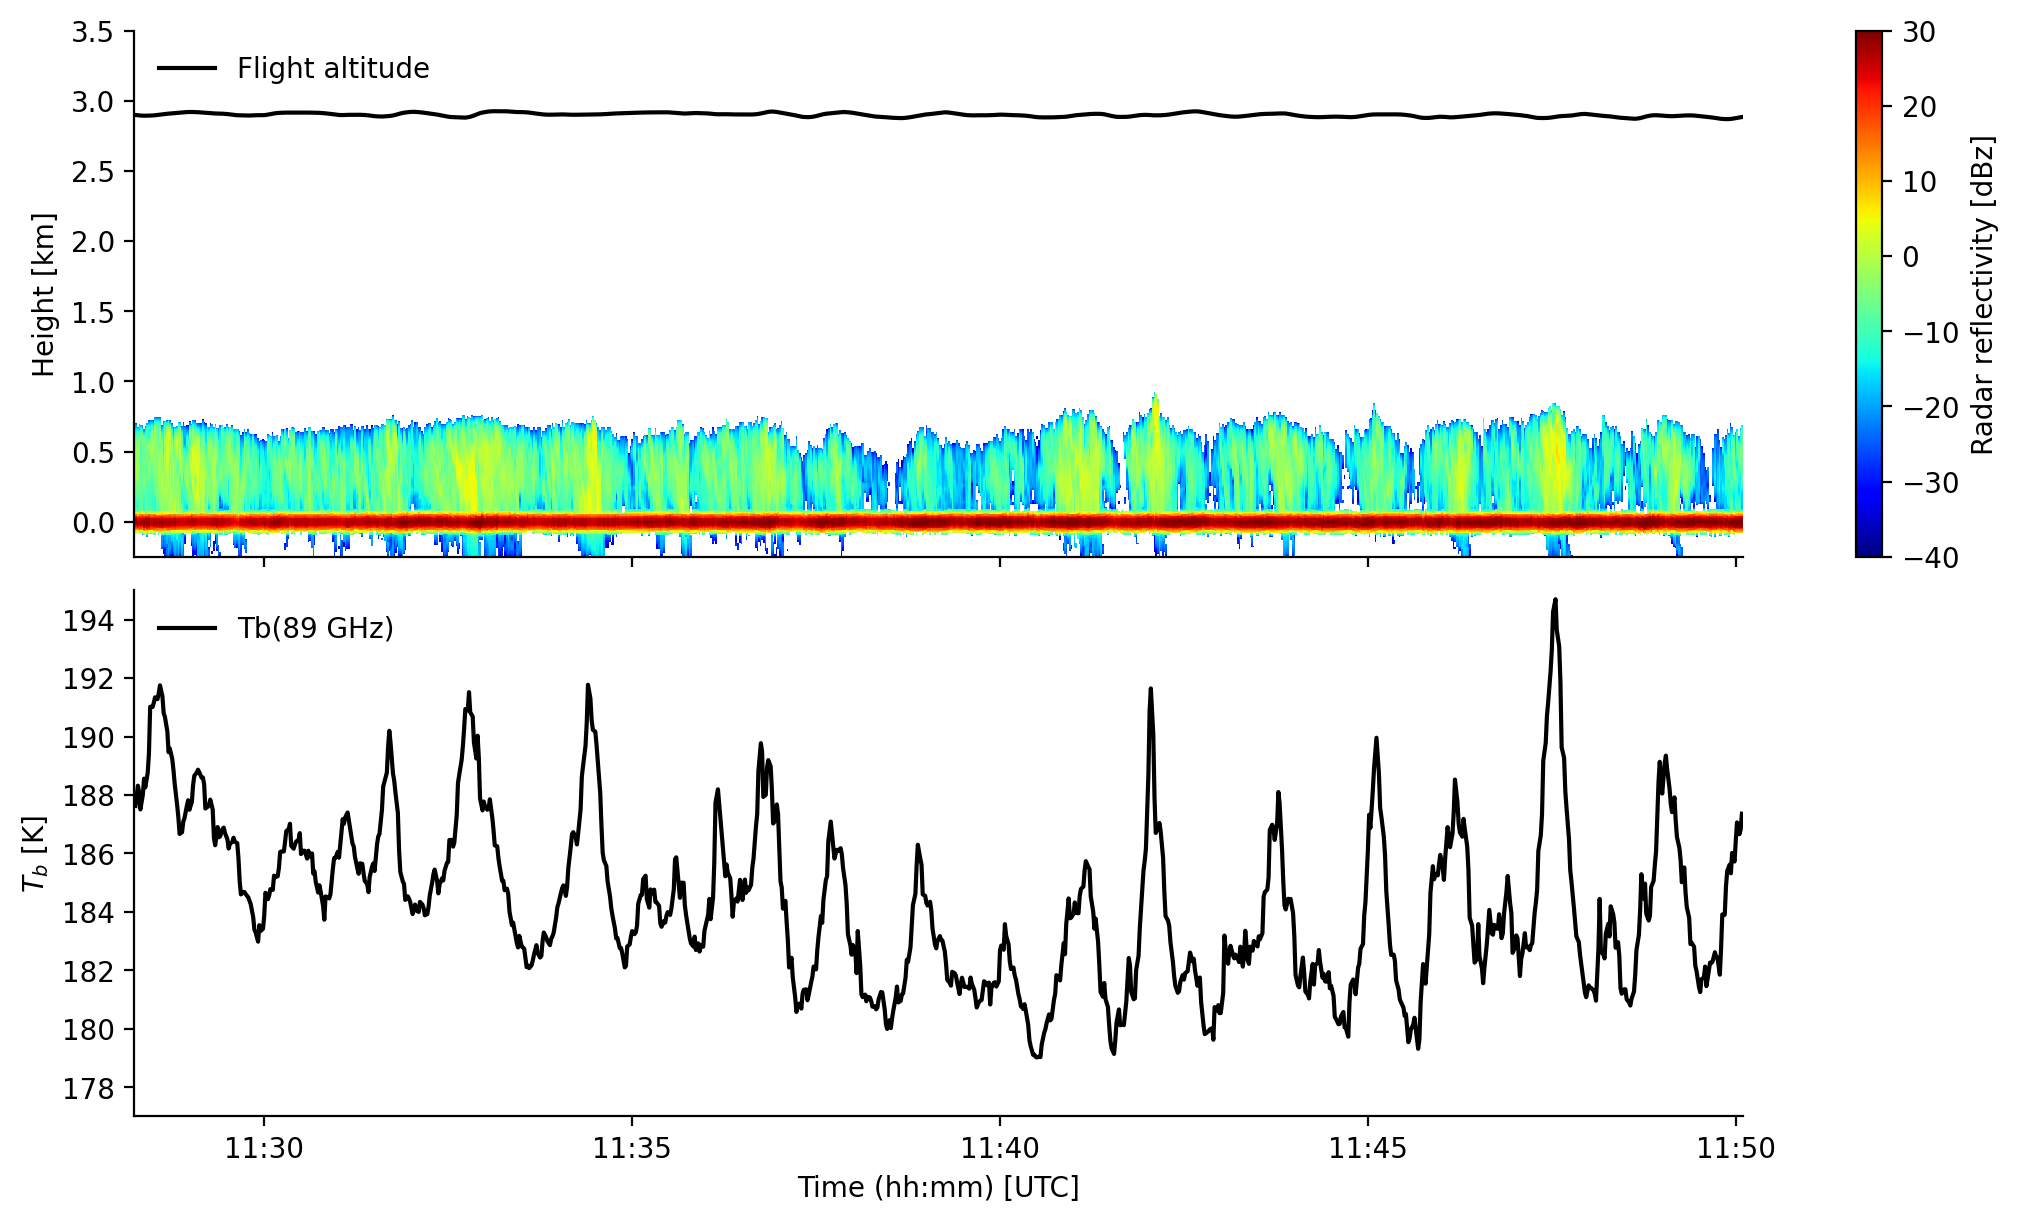

In [9]:
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)

# 1st: plot flight altitude and radar reflectivity
ax1.plot(ds_mirac_a_sel.time, ds_mirac_a_sel.altitude*1e-3, label='Flight altitude', color='k')

im = ax1.pcolormesh(ds_mirac_a_sel.time, ds_mirac_a_sel.height*1e-3, 10*log10(ds_mirac_a_sel.Ze).T, vmin=-40, vmax=30, cmap='jet', shading='nearest')
fig.colorbar(im, ax=ax1, label='Radar reflectivity [dBz]')
ax1.set_ylim(-0.25, 3.5)
ax1.set_ylabel('Height [km]')
ax1.legend(frameon=False, loc='upper left')

# 2nd: plot 89 GHz TB
ax2.plot(ds_mirac_a_sel.time, ds_mirac_a_sel.TB_89, label='Tb(89 GHz)', color='k')
ax2.set_ylim(177, 195)
ax2.set_ylabel('$T_b$ [K]')
ax2.set_xlabel('Time (hh:mm) [UTC]')
ax2.legend(frameon=False, loc='upper left')

ax2.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))

plt.show()